In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm 
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , f1_score ,recall_score , precision_score,accuracy_score ,confusion_matrix ,roc_curve, auc, roc_auc_score
from sklearn.model_selection import GridSearchCV
#import mlxtend
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.decomposition import pca
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [2]:
%matplotlib inline
hyper = pd.read_csv('manpre2.csv').drop('id',axis=1)
feature_names = ['Age', 'Obese', 'bmi', 'wc' , 'hc' , 'whr' , 'DBP']
#X = hyper[feature_names]
#y = hyper['hyper']
print(hyper.head())
print("dimension of Hypertension data: {}".format(hyper.shape))
X = hyper.drop('hyper',1)
y = hyper['hyper']



   Age  Obese    bmi   wc   hc  whr     SBP    DBP  hyper
0   20      0  27.94   95  112   85  120.00  80.00      1
1   19      0  18.65   69   85   81  100.00  63.33      1
2   31      0  27.62  102  107   95  106.67  70.00      1
3   22      0  24.96   86  107   80  120.00  80.00      1
4   19      0  25.15   82   99   83  126.67  80.00      1
dimension of Hypertension data: (175, 9)


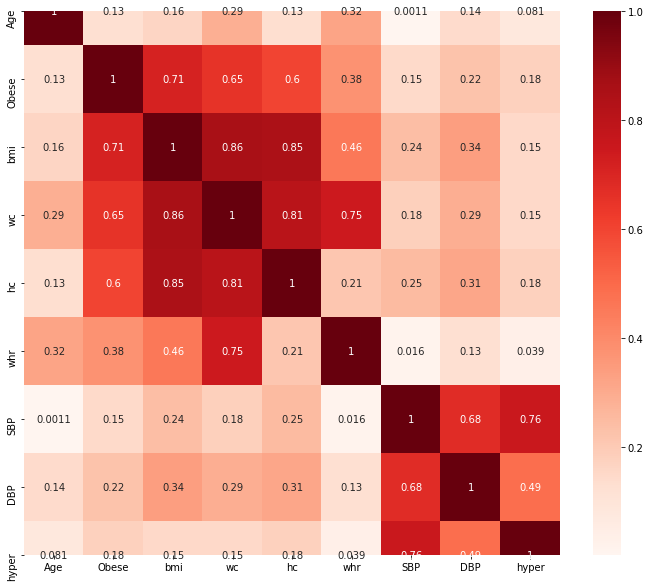

In [3]:
plt.figure(figsize=(12,10))
cor = hyper.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [4]:
#Correlation with output variable
#cor_target = abs(cor["hyper"])
#Selecting highly correlated features
#relevant_features = cor_target[cor_target>0.50]
#print(cor_target)



In [5]:
corr_matrix = hyper.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

#Find features with correlation greater than 0.95

    
to_drop = [column for column in upper.columns if any(upper[column] > 0.50 )] 

   



#X=hyper.drop(['Age', 'Obese', 'bmi', 'wc', 'hc', 'whr', 'DBP'],1)
X1=hyper.drop(to_drop,axis=1,inplace=True)
print(hyper.columns)
# Drop features 
#print(hyper.columns)
#print("dimension of Hypertension data: {}".format(hyper.shape))
#print(hyper.groupby('hyper').size())


Index(['Age', 'Obese', 'SBP'], dtype='object')


In [6]:
LR= LogisticRegression()
KNN= KNeighborsClassifier()
CART= DecisionTreeClassifier()
NB= GaussianNB()
SVM= SVC(kernel='linear',random_state=42)
MLP=MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=20,random_state=1)
DT=DecisionTreeClassifier(random_state=42)
RF=RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=30,random_state=7)
def model(model,X_tr, X_te, y_tr, y_te):
    model.fit(X_tr,y_tr)
    predict=model.predict(X_te)
    mae = np.mean(abs(predict - y_te))
    print('MAE = %0.4f' % mae)
    confusion_matrix(y_te, predict)
    print('accuracy score',accuracy_score(y_te,predict)*100)
    fpr, tpr, thresholds = metrics.roc_curve(y_te, predict, pos_label=1)
    auc=metrics.auc(fpr, tpr)
    print('AUC',auc)
    print('Classification report \n')
    print(classification_report(y_te,predict))
    print("Train acc: ",accuracy_score(y_tr,model.predict(X_tr)))
    print("test acc: ",accuracy_score(y_te,predict))

In [8]:
from sklearn.model_selection import cross_val_score
def crossV(model,X,y):
    print("Cross Validation: ")
    accuracy = cross_val_score(model, X, y, scoring='accuracy', cv = 10).mean() * 100
    print("Accuracy : " , accuracy)
    f1 = cross_val_score( model, X, y, cv=10, scoring='f1_macro').mean() * 100
    print("f1 : " , f1)

    recall = cross_val_score( model, X, y, cv=10, scoring='recall_macro').mean() * 100
    print("recall : " , recall)

    precision = cross_val_score( model, X, y, cv=10, scoring='precision_macro').mean() * 100
    print("precision : " , precision)

In [9]:
print("Logistic Regression:")
crossV(LR,X,y)
model(LR,X_train, X_test, y_train, y_test)
print("Suport Vector Machine:")
crossV(SVM,X,y)
model(SVM,X_train, X_test, y_train, y_test)
print("MLP:")
crossV(MLP,X,y)
model(MLP,X_train, X_test, y_train, y_test)
print("Naive Bayes:")
crossV(NB,X,y)
model(NB,X_train, X_test, y_train, y_test)
print(" KNN:")
crossV(KNN,X,y)
model(KNN,X_train, X_test, y_train, y_test)
print("Decision Tree :")
crossV(DT,X,y)
model(DT,X_train, X_test, y_train, y_test)
print("Random forest  :")
crossV(RF,X,y)
model(RF,X_train, X_test, y_train, y_test)
print("CART   :")
crossV(CART,X,y)
model(CART,X_train, X_test, y_train, y_test)

Logistic Regression:
Cross Validation: 
Accuracy :  97.18954248366015


/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

f1 :  96.2420153920154
recall :  96.23076923076923
precision :  97.14285714285715
MAE = 0.0667
accuracy score 93.33333333333333
AUC 0.075
Classification report 



/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           1       0.95      0.95      0.95        20
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Train acc:  0.9862068965517241
test acc:  0.9333333333333333
Suport Vector Machine:
Cross Validation: 
Accuracy :  95.97222222222221
f1 :  94.29174344174346
recall :  93.73076923076923
precision :  96.5952380952381
MAE = 0.0000
accuracy score 100.0
AUC 0.0
Classification report 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  1.0
test acc:  1.0
MLP:
Cross Validation: 


/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't co

Accuracy :  73.20261437908498


/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, Co

f1 :  42.259600614439314


/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't co

recall :  50.0


/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted

precision :  36.60130718954249
MAE = 0.3333
accuracy score 66.66666666666666
AUC 0.5
Classification report 

              precision    recall  f1-score   support

           1       0.67      1.00      0.80        20
           2       0.00      0.00      0.00        10

    accuracy                           0.67        30
   macro avg       0.33      0.50      0.40        30
weighted avg       0.44      0.67      0.53        30

Train acc:  0.7448275862068966
test acc:  0.6666666666666666
Naive Bayes:
Cross Validation: 
Accuracy :  84.83251633986927


/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


f1 :  80.56684768481503
recall :  81.97435897435896
precision :  86.36370573870573
MAE = 0.1333
accuracy score 86.66666666666667
AUC 0.1
Classification report 

              precision    recall  f1-score   support

           1       1.00      0.80      0.89        20
           2       0.71      1.00      0.83        10

    accuracy                           0.87        30
   macro avg       0.86      0.90      0.86        30
weighted avg       0.90      0.87      0.87        30

Train acc:  0.903448275862069
test acc:  0.8666666666666667
 KNN:
Cross Validation: 
Accuracy :  93.7173202614379
f1 :  91.20951640951643
recall :  90.09615384615385
precision :  93.80952380952381
MAE = 0.0667
accuracy score 93.33333333333333
AUC 0.09999999999999998
Classification report 

              precision    recall  f1-score   support

           1       0.91      1.00      0.95        20
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   

In [137]:
print(hyper.head())

   Age  Obese  whr     SBP
0   20      0   85  120.00
1   19      0   81  100.00
2   31      0   95  106.67
3   22      0   80  120.00
4   19      0   83  126.67
